In [1]:
library(jsonlite)
library("randomForest")
library(dplyr)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Chargement du jeu de données
path="/home/user/Documents/STA211-Datamining/Projet_STA/"
Airbnb<-fromJSON(paste(path,"airbnb_V3.json",sep=""))
sapply(Airbnb,class)
summary(Airbnb)


_id           accommodates              bathrooms 
             "integer"            "character"            "character" 
              bed_type               bedrooms                   beds 
           "character"            "character"            "character" 
         property_type              room_type         arrondissement 
           "character"            "character"              "numeric" 
host_identity_verified      host_is_superhost          host_listings 
           "character"            "character"            "character" 
         host_response             host_since          cancel_policy 
           "character"            "character"            "character" 
      instant_bookable        availability_30       availability_365 
           "character"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"            "character" 
           last_review             nb_reviews    score_communication 
           "character"            "character"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"            "character"

      _id           accommodates        bathrooms           bed_type        
 Min.   :    2525   Length:41094       Length:41094       Length:41094      
 1st Qu.: 3688220   Class :character   Class :character   Class :character  
 Median : 7887020   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8425822                                                           
 3rd Qu.:13304907                                                           
 Max.   :17968815                                                           
   bedrooms             beds           property_type       room_type        
 Length:41094       Length:41094       Length:41094       Length:41094      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [3]:
character_vars <- lapply(Airbnb, class) == "character"
Airbnb[, character_vars] <- lapply(Airbnb[, character_vars], as.factor)
#définition de la variable arrondissement comme qualitative
Airbnb$arrondissement <- as.factor(Airbnb$arrondissement ) 
sapply(Airbnb,class)

_id           accommodates              bathrooms 
             "integer"               "factor"               "factor" 
              bed_type               bedrooms                   beds 
              "factor"               "factor"               "factor" 
         property_type              room_type         arrondissement 
              "factor"               "factor"               "factor" 
host_identity_verified      host_is_superhost          host_listings 
              "factor"               "factor"               "factor" 
         host_response             host_since          cancel_policy 
              "factor"               "factor"               "factor" 
      instant_bookable        availability_30       availability_365 
              "factor"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"               "factor" 
           last_review             nb_reviews    score_communication 
              "factor"               "factor"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"               "factor"

In [4]:
Airbnb <- subset(Airbnb, select = -c(total_price) )
Airbnb_train <- Airbnb %>% sample_frac(0.1)

In [5]:
#AirbnbRF <- randomForest(total_price~.,Airbnb[2:28], na.action = na.roughfix)
AirbnbRF <- randomForest(price_level~.,Airbnb_train[2:28], na.action = na.roughfix)
print(AirbnbRF)


Call:
 randomForest(formula = price_level ~ ., data = Airbnb_train[2:28],      na.action = na.roughfix) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 44.22%
Confusion matrix:
           Cher Eleve Exorbitant Faible Moyen class.error
Cher        859   159          3     12    73   0.2233273
Eleve       262   335          0     68   279   0.6451271
Exorbitant   63     0          3      0     0   0.9545455
Faible       14    56          0    598   262   0.3569892
Moyen        77   215          0    274   497   0.5324553


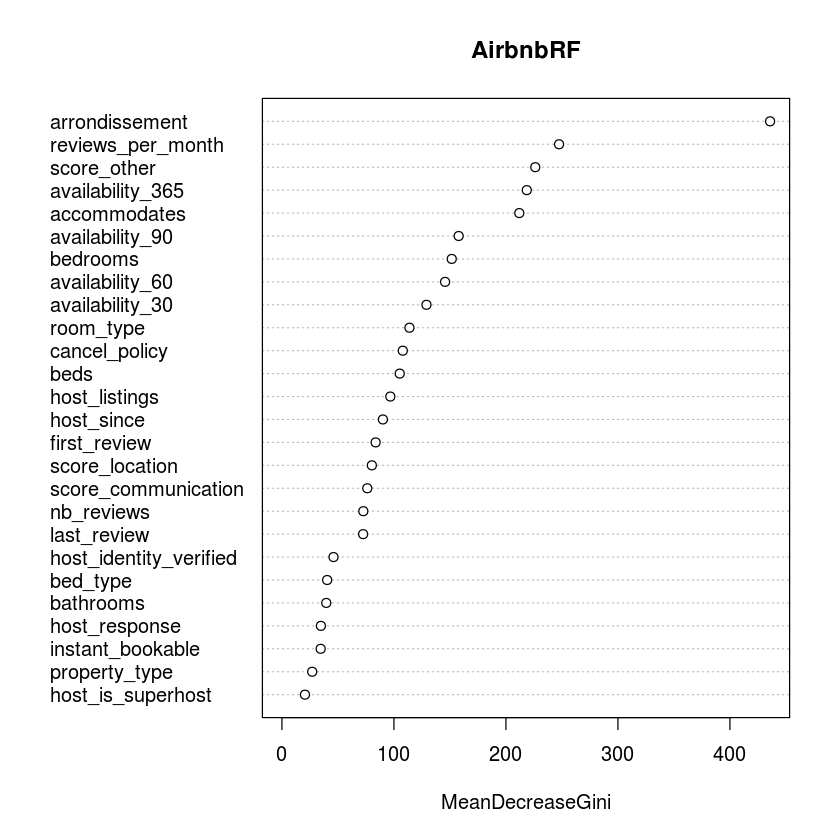

In [6]:
varImpPlot(AirbnbRF)


Call:
 randomForest(formula = price_level ~ ., data = Airbnb_train[2:28],      ntree = 5000, mtry = 2, na.action = na.roughfix) 
               Type of random forest: classification
                     Number of trees: 5000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 45.07%
Confusion matrix:
           Cher Eleve Exorbitant Faible Moyen class.error
Cher        871   143          0     18    74   0.2124774
Eleve       294   281          0     76   293   0.7023305
Exorbitant   65     0          1      0     0   0.9848485
Faible       20    40          0    607   263   0.3473118
Moyen        89   199          0    278   497   0.5324553


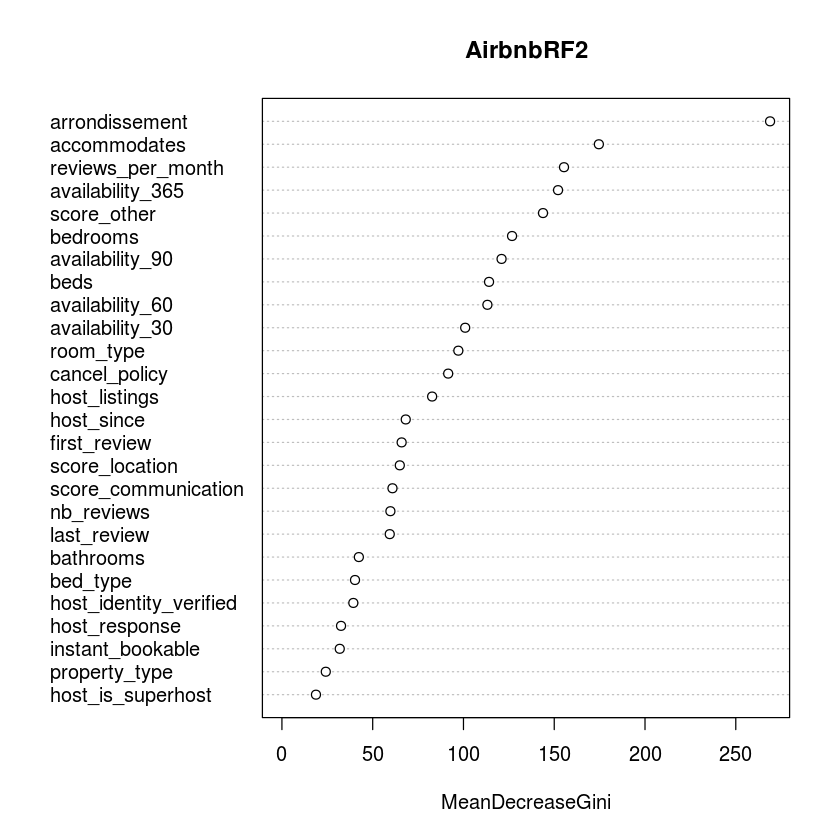

In [7]:
AirbnbRF2 <- randomForest(price_level~.,Airbnb_train[2:28], ntree=5000, mtry=2, na.action = na.roughfix)
print(AirbnbRF2)
varImpPlot(AirbnbRF2)


Call:
 randomForest(formula = price_level ~ ., data = Airbnb_train[2:28],      ntree = 200, mtry = 4, na.action = na.roughfix) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 4

        OOB estimate of  error rate: 44.37%
Confusion matrix:
           Cher Eleve Exorbitant Faible Moyen class.error
Cher        850   157          2     15    82   0.2314647
Eleve       263   354          0     65   262   0.6250000
Exorbitant   63     0          3      0     0   0.9545455
Faible       16    57          0    591   266   0.3645161
Moyen        85   220          0    270   488   0.5409219


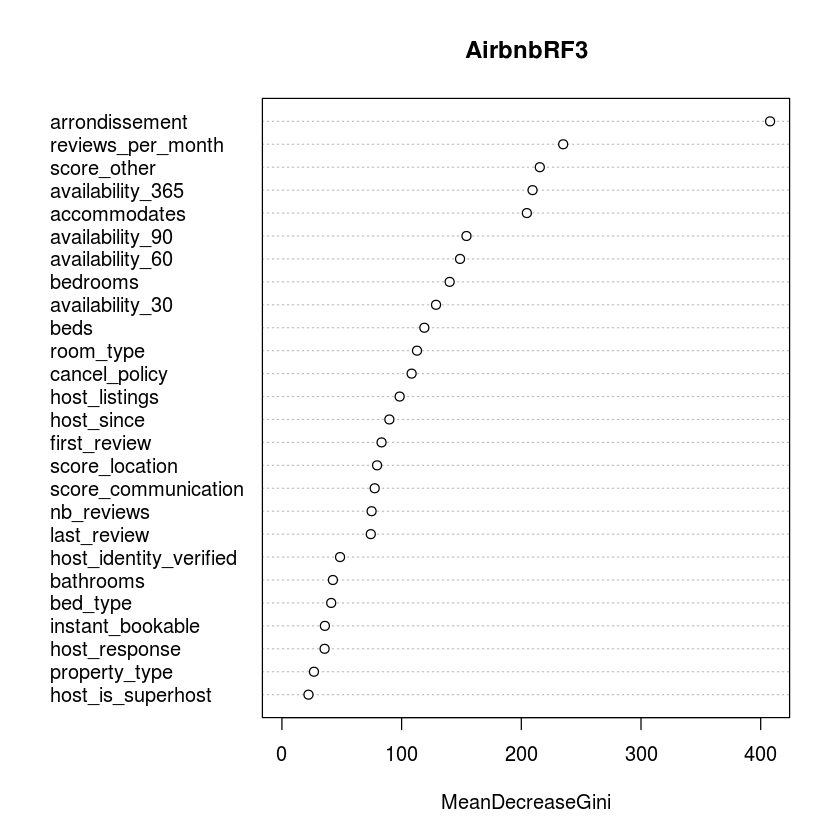

In [8]:
AirbnbRF3 <- randomForest(price_level~.,Airbnb_train[2:28], ntree=200, mtry=4, na.action = na.roughfix)
print(AirbnbRF3)
varImpPlot(AirbnbRF3)

In [9]:
AirbnbRF3$importance

,MeanDecreaseGini
accommodates,204.61765
bathrooms,42.58341
bed_type,41.16801
bedrooms,140.13543
beds,118.97944
property_type,26.75130
room_type,112.85201
arrondissement,407.83491
host_identity_verified,48.56607
host_is_superhost,22.18384



Call:
 randomForest(formula = price_level ~ ., data = New_Airbnb_train,      ntree = 200, mtry = 4, na.action = na.roughfix) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 4

        OOB estimate of  error rate: 53.32%
Confusion matrix:
           Cher Eleve Exorbitant Faible Moyen class.error
Cher        746   194         11     28   127   0.3254973
Eleve       268   282          1    134   259   0.7012712
Exorbitant   59     1          4      1     1   0.9393939
Faible       26   107          0    506   291   0.4559140
Moyen       108   251          2    322   380   0.6425212


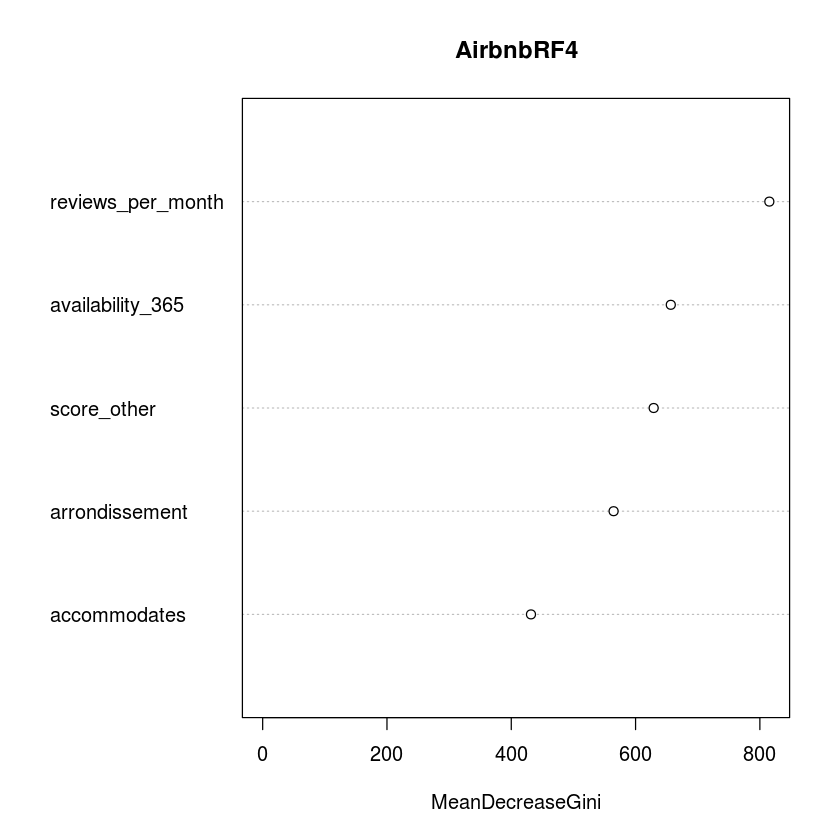

In [13]:
New_Airbnb_train<-select(Airbnb_train,accommodates,arrondissement,availability_365,score_other,reviews_per_month,price_level)

AirbnbRF4 <- randomForest(price_level~.,New_Airbnb_train, ntree=200, mtry=4, na.action = na.roughfix)
print(AirbnbRF4)
varImpPlot(AirbnbRF4)